In [2]:
import numpy as np
import nibabel as nb
import pandas as pd
import pilot
import nat_asd_utils  

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]


parcel_names_list=[
        'A1',
        'LBelt',
        'MBelt',
        'PBelt',
        'A4',
        'TA2',
        'A5']
#load mappings
parcels=pilot.select_parcels('auditory') # load parcel set
atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
sub_data_list=[]
sub_r2_list=[]
for sub in good_subjects_list:
    #sub='01'
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-auditory_feat-cochresnet50srp05hrfssfirst_delay-0.npz')
    sub_data=loaded['S_average']
    r2_data=loaded['stacked_r2s']
    parcel_data_list=[]
    parcel_r2_list=[]
    #map to full brain
    full_brain=np.zeros((91282,8))
    full_brain[atlas_indices_indices]=sub_data
    full_brain_r2=np.zeros((91282,))
    full_brain_r2[atlas_indices_indices]=r2_data

    
    for p in parcel_names_list:
        #load specific mapping
        parcel_mapping=pilot.extract_parcels([p])
        #pull from brain
        parcel_data_list.append(np.mean(full_brain[parcel_mapping],axis=0))
        parcel_r2_list.append(np.mean(full_brain_r2[parcel_mapping],axis=0))

    sub_data_list.append(parcel_data_list)
    sub_r2_list.append(parcel_r2_list)

dec_list= np.mean( np.asanyarray(sub_r2_list) , axis=0)
roi_list=[
        'A1',
        'LBelt',
        'MBelt',
        'PBelt',
        'A4',
        'TA2',
        'A5']
formatted_list = [f"{s}, R^2={d:.3f}" for s, d in zip(roi_list, dec_list)]
data=np.asanyarray(sub_data_list)

/tmp/ipykernel_3679872/4178512996.py:28: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='ROI', y='Value', hue='Layer', data=df_long,


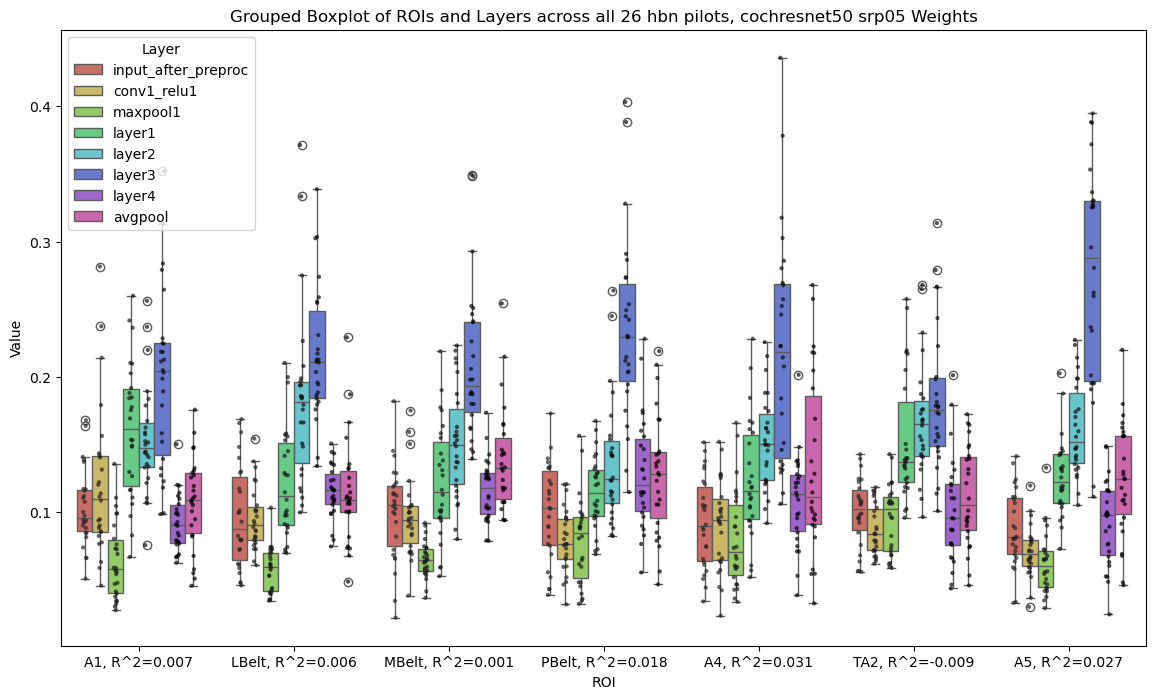

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_palette("hls", 8)
# Example data
data=np.asanyarray(sub_data_list)
# Reshape data into a DataFrame
subjects, rois, layers = data.shape
df = pd.DataFrame(data.reshape(subjects * rois, layers),
                  columns=['input_after_preproc',
                    'conv1_relu1',
                    'maxpool1',
                    'layer1',
                    'layer2',
                    'layer3',
                    'layer4',
                    'avgpool'])
df['ROI'] = np.repeat(formatted_list, subjects)

# Melt the DataFrame to long format for seaborn
df_long = df.melt(id_vars='ROI', var_name='Layer', value_name='Value')

# Create the grouped boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='ROI', y='Value', hue='Layer', data=df_long)
sns.stripplot(x='ROI', y='Value', hue='Layer', data=df_long, 
              jitter=True, dodge=True, marker='o', alpha=0.7, color='black',size=3,legend=False)
plt.title('Grouped Boxplot of ROIs and Layers across all 26 hbn pilots, cochresnet50 srp05 Weights')
plt.show()

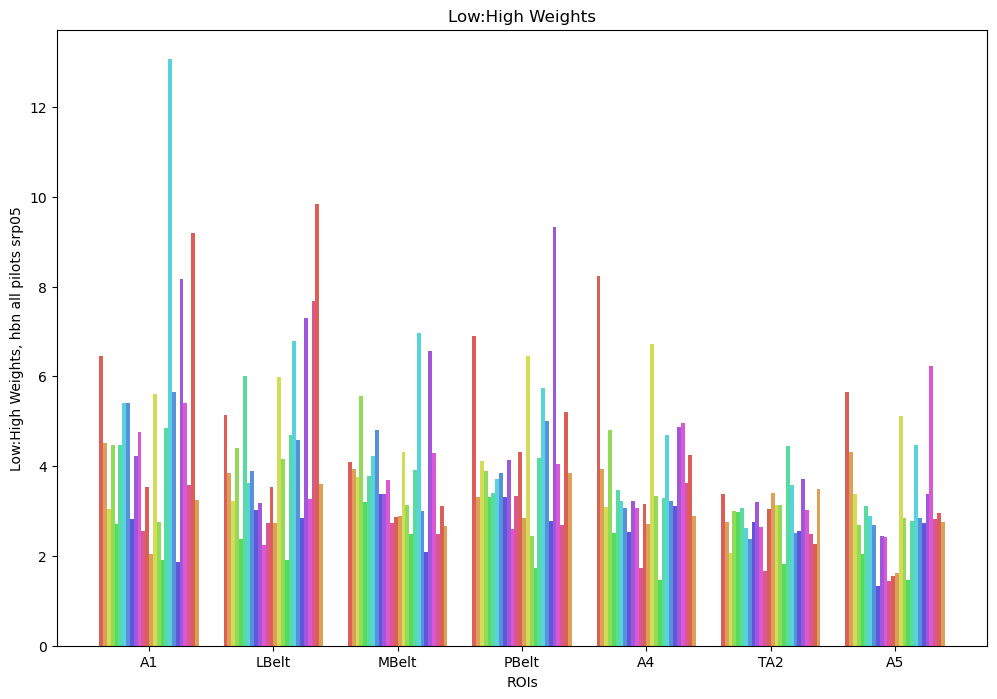

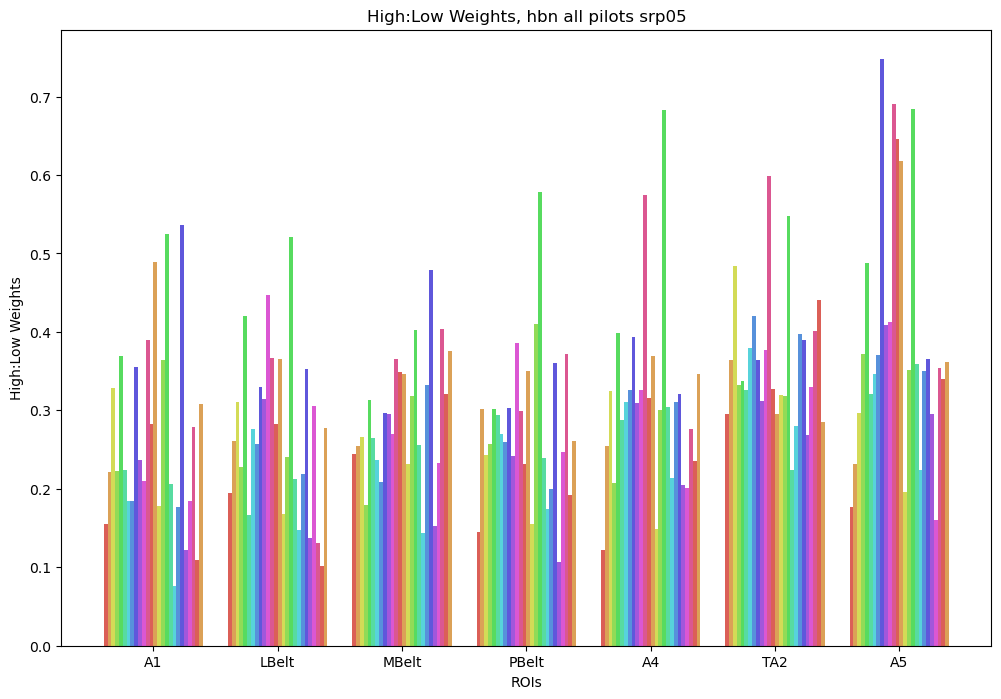

/tmp/ipykernel_3679872/3627734605.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROIs', y='Value', data=df, whis=[0, 100], width=0.6, palette="vlag")


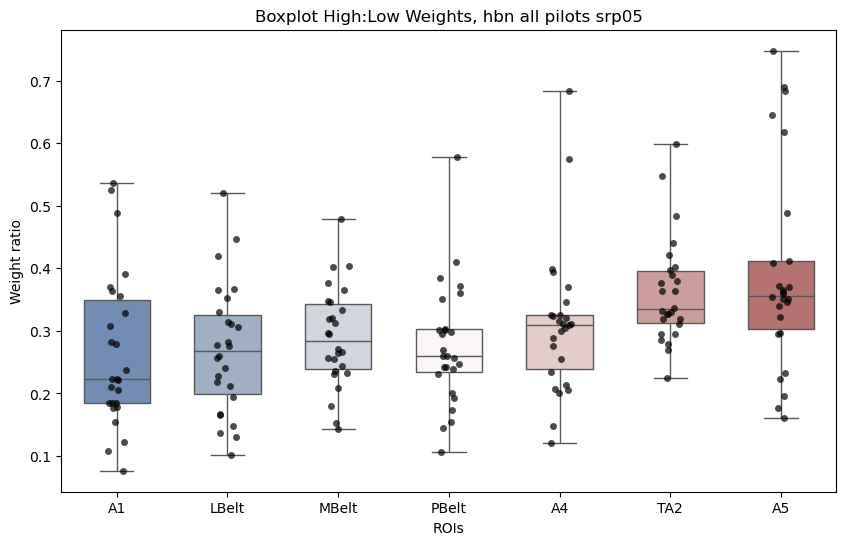

/tmp/ipykernel_3679872/3627734605.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ROIs', y='Value', data=df, whis=[0, 100], width=0.6, palette="vlag")


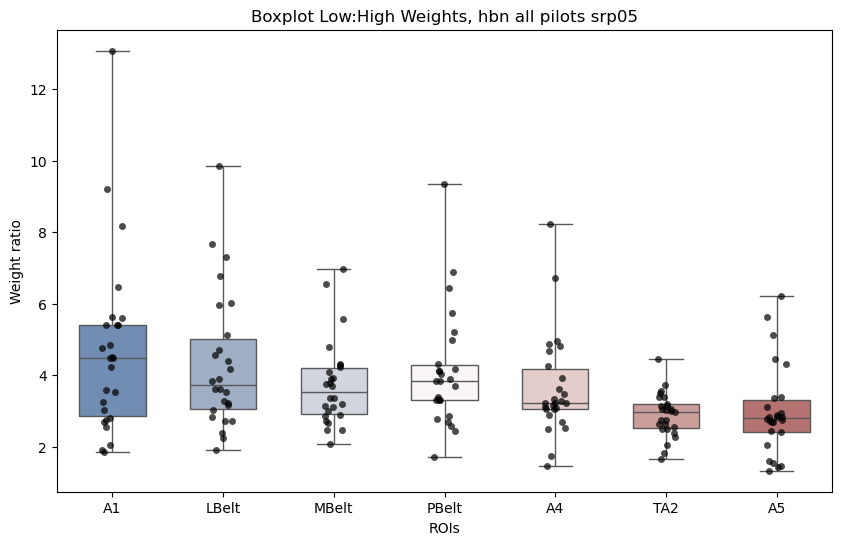

In [5]:
#low_level_mean
#get combined weights of bottom 4
low_level_data=data[:,:,:6]
low_level_data=np.sum(low_level_data,axis=2)
high_level_data=data[:,:,6:]
high_level_data=np.sum(high_level_data,axis=2)

low_high=low_level_data/high_level_data
high_low=high_level_data/low_level_data
roi_list=[
        'A1',
        'LBelt',
        'MBelt',
        'PBelt',
        'A4',
        'TA2',
        'A5']


import numpy as np
import matplotlib.pyplot as plt

title='hbn all pilots srp05'
sns.set_palette("hls", 12)
# Sample data (replace this with your actual array)
data = low_high
# Number of groups and bars per group
num_groups = data.shape[1]
num_bars = data.shape[0]
# Positions of the groups
group_positions = np.arange(num_groups)
# Width of a single bar
bar_width = 0.8 / num_bars
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Loop over each bar in a group
for i in range(num_bars):
    bar_positions = group_positions + i * bar_width
    ax.bar(bar_positions, data[i], bar_width, label=f'Bar {i + 1}')
# Labels and title
ax.set_xlabel('ROIs')
ax.set_ylabel(f'Low:High Weights, {title}')
ax.set_title('Low:High Weights')
ax.set_xticks(group_positions + bar_width * (num_bars / 2 - 0.5))
ax.set_xticklabels(roi_list)
#ax.legend()

# Show plot
plt.show()


import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("hls", 12)
# Sample data (replace this with your actual array)
data = high_low
# Number of groups and bars per group
num_groups = data.shape[1]
num_bars = data.shape[0]
# Positions of the groups
group_positions = np.arange(num_groups)
# Width of a single bar
bar_width = 0.8 / num_bars
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Loop over each bar in a group
for i in range(num_bars):
    bar_positions = group_positions + i * bar_width
    ax.bar(bar_positions, data[i], bar_width, label=f'Bar {i + 1}')
# Labels and title
ax.set_xlabel('ROIs')
ax.set_ylabel('High:Low Weights')
ax.set_title(f'High:Low Weights, {title}')
ax.set_xticks(group_positions + bar_width * (num_bars / 2 - 0.5))
ax.set_xticklabels(roi_list)
#ax.legend()

# Show plot
plt.show()


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual array)
data = high_low

# Create a DataFrame suitable for Seaborn
df = pd.DataFrame(data, columns=roi_list)
df = df.melt(var_name='ROIs', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ROIs', y='Value', data=df, whis=[0, 100], width=0.6, palette="vlag")

# Overlay the individual data points
sns.stripplot(x='ROIs', y='Value', data=df, jitter=True, color='black', alpha=0.7)

# Labels and title
plt.xlabel('ROIs')
plt.ylabel('Weight ratio')
plt.title(f'Boxplot High:Low Weights, {title}')

# Show plot
plt.show()

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual array)
data = low_high

# Create a DataFrame suitable for Seaborn
df = pd.DataFrame(data, columns=roi_list)
df = df.melt(var_name='ROIs', value_name='Value')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ROIs', y='Value', data=df, whis=[0, 100], width=0.6, palette="vlag")

# Overlay the individual data points
sns.stripplot(x='ROIs', y='Value', data=df, jitter=True, color='black', alpha=0.7)

# Labels and title
plt.xlabel('ROIs')
plt.ylabel('Weight ratio')
plt.title(f'Boxplot Low:High Weights, {title}')

# Show plot
plt.show()
